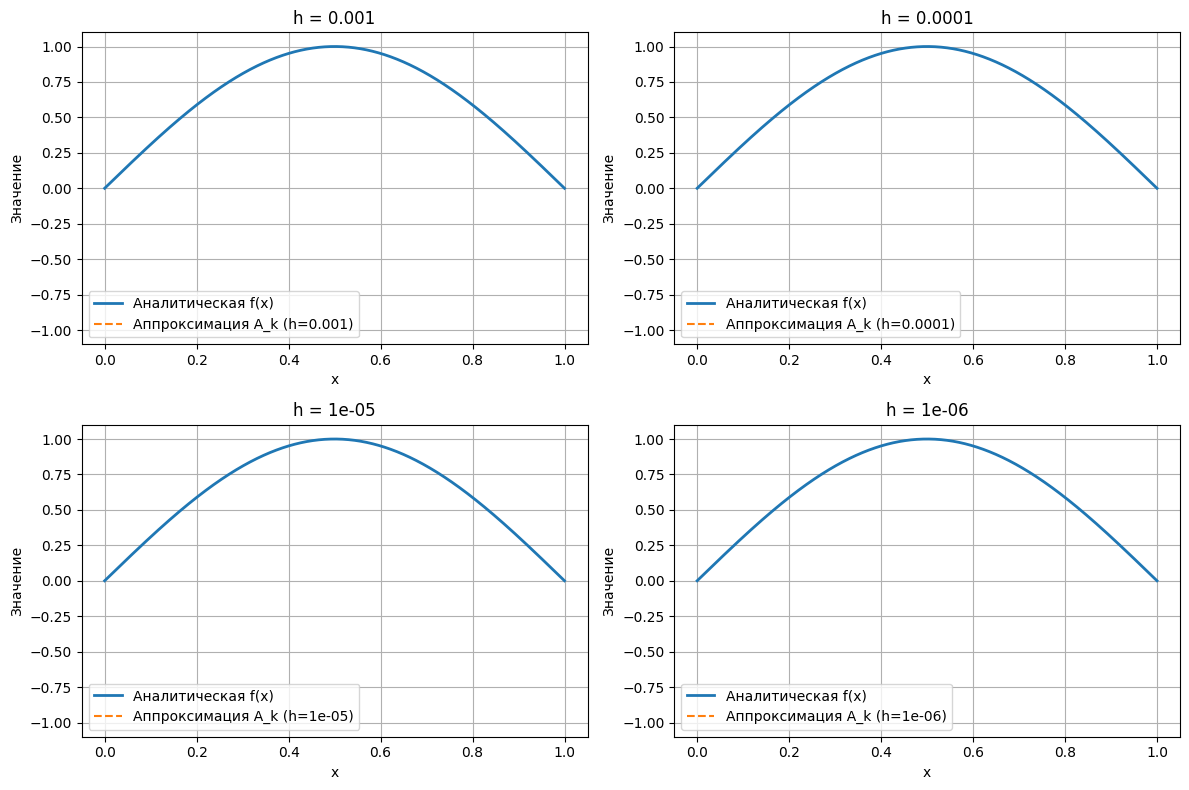

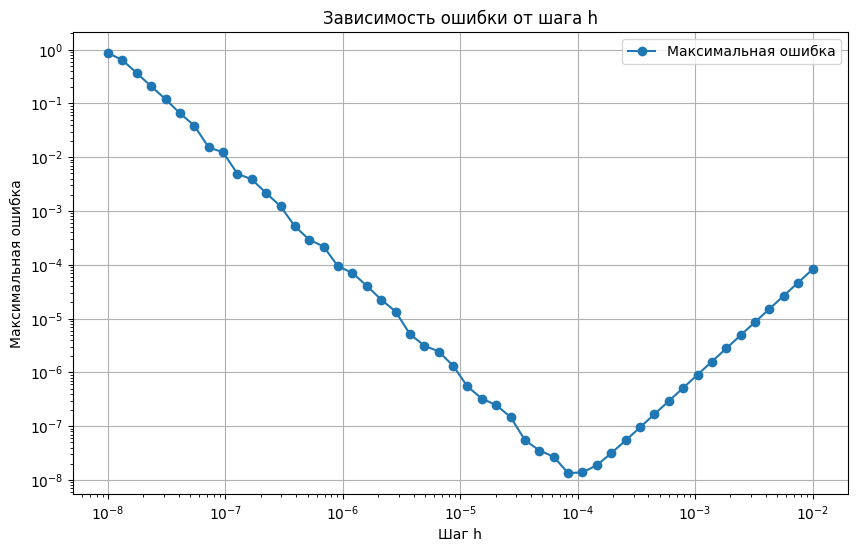

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n = 1
pi = np.pi

def u(x):
    return np.sin(pi * n * x) / (pi**2 * n**2)

def f(x):
    return np.sin(pi * n * x)

h_values = [0.001, 0.0001, 0.00001, 0.000001]
x_plot = np.linspace(0, 1.0, 1000)
f_analytical = f(x_plot)

plt.figure(figsize=(12, 8))

for i, h in enumerate(h_values):
    x = np.arange(0, 1, 1000)
    u_vals = u(x)
    
    A = np.zeros_like(x)
    A[1:-1] = -(u_vals[2:] - 2 * u_vals[1:-1] + u_vals[:-2]) / h**2
    
    x_inner = x[1:-1]
    A_inner = A[1:-1]
    
    plt.subplot(2, 2, i + 1)
    plt.plot(x_plot, f_analytical, label='Аналитическая f(x)', linewidth=2)
    plt.plot(x_inner, A_inner, label=f'Аппроксимация A_k (h={h})', linestyle='--')
    # plt.xlim(0, 0.02)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('x')
    plt.ylabel('Значение')
    plt.legend()
    plt.title(f'h = {h}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# График ошибки
h_list = np.logspace(-8, -2, 50)
errors = []

for h in h_list:
    x = np.arange(0, 1 , h)
    u_vals = u(x)
    A = np.zeros_like(x)
    A[1:-1] = -(u_vals[2:] - 2 * u_vals[1:-1] + u_vals[:-2]) / h**2
    x_inner = x[1:-1]
    error = np.max(np.abs(A[1:-1] - f(x_inner)))
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.loglog(h_list, errors, 'o-', label='Максимальная ошибка')
plt.xlabel('Шаг h')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость ошибки от шага h')
plt.grid(True)
plt.legend()
plt.show()

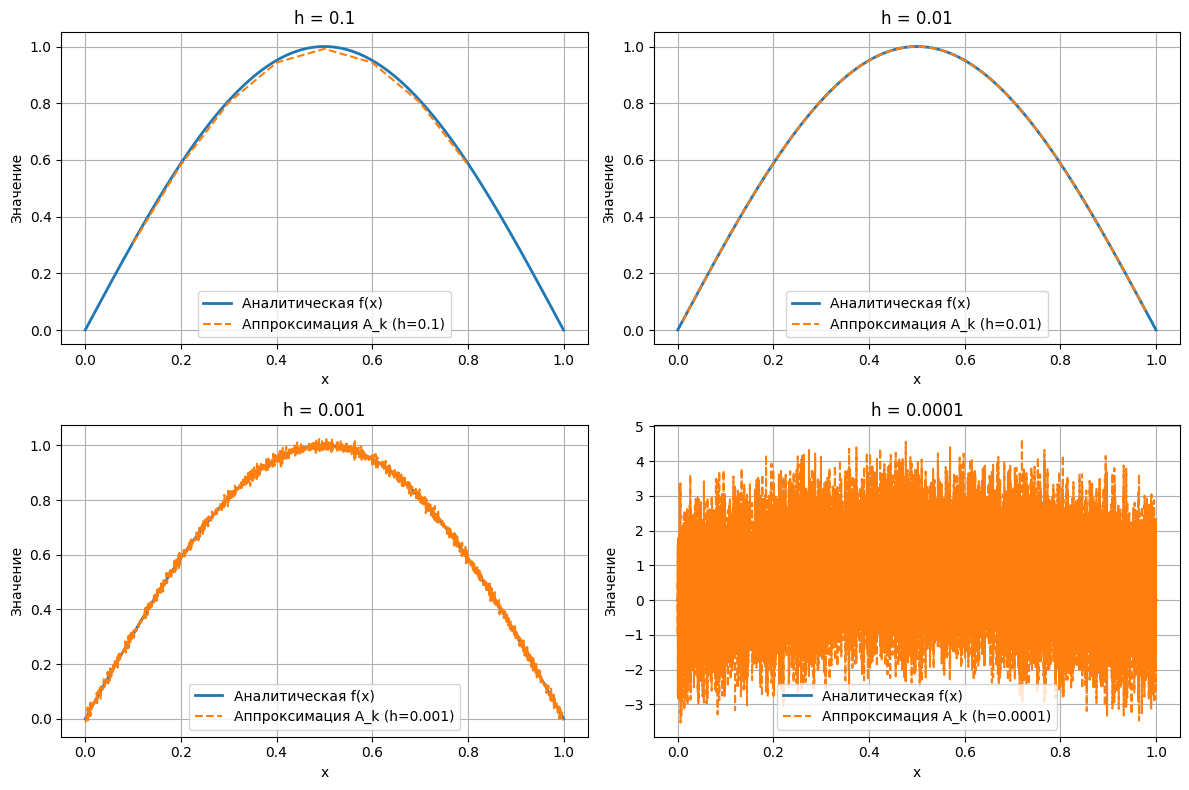

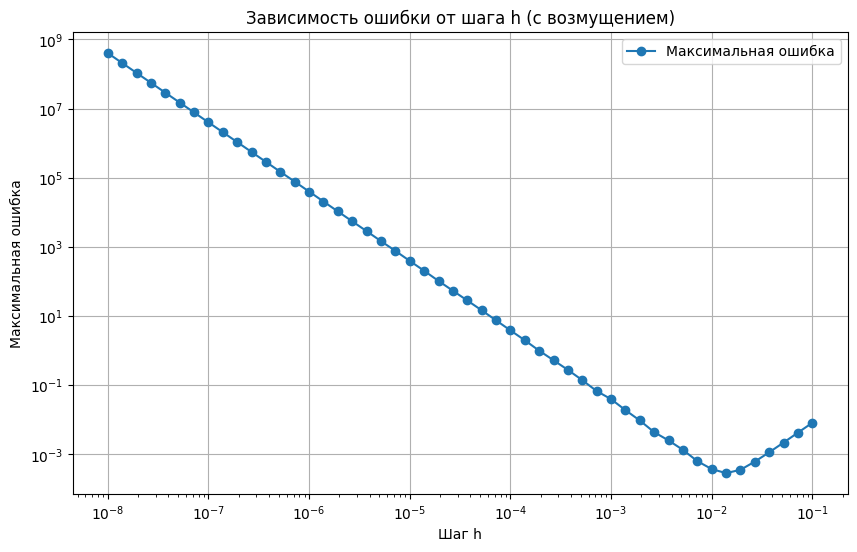

In [42]:
import numpy as np
import matplotlib.pyplot as plt

n = 1
pi = np.pi
delta = 1e-8

def u(x):
    return np.sin(pi * n * x) / (pi**2 * n**2)

def f(x):
    return np.sin(pi * n * x)

# Функция с возмущением
def u_perturbed(x):
    u_clean = u(x)
    perturbation = delta * (2 * np.random.random(len(x)) - 1)
    return u_clean + perturbation

h_values = [0.1, 0.01, 0.001, 0.0001]
x_plot = np.linspace(0, 1.0, 1000)  
f_analytical = f(x_plot)

plt.figure(figsize=(12, 8))

for i, h in enumerate(h_values):
    x = np.arange(0, 1, h)  
    u_vals = u_perturbed(x)  
    
    A = np.zeros_like(x)
    A[1:-1] = -(u_vals[2:] - 2 * u_vals[1:-1] + u_vals[:-2]) / h**2
    
    x_inner = x[1:-1]
    A_inner = A[1:-1]
    
    plt.subplot(2, 2, i + 1)
    plt.plot(x_plot, f_analytical, label='Аналитическая f(x)', linewidth=2)
    plt.plot(x_inner, A_inner, label=f'Аппроксимация A_k (h={h})', linestyle='--')
    # plt.xlim(0, 0.02)  
    # plt.ylim(-1.1, 1.1)
    plt.xlabel('x')
    plt.ylabel('Значение')
    plt.legend()
    plt.title(f'h = {h}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# График ошибки
h_list = np.logspace(-8, -1, 50)
errors = []

for h in h_list:
    x = np.arange(0, 1 + h, h)  # Чтобы изменить отрезок, поменяйте 1 на 0.02
    u_vals = u_perturbed(x)  # Используем возмущенную функцию
    A = np.zeros_like(x)
    A[1:-1] = -(u_vals[2:] - 2 * u_vals[1:-1] + u_vals[:-2]) / h**2
    x_inner = x[1:-1]
    error = np.max(np.abs(A[1:-1] - f(x_inner)))
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.loglog(h_list, errors, 'o-', label='Максимальная ошибка')
plt.xlabel('Шаг h')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость ошибки от шага h (с возмущением)')
plt.grid(True)
plt.legend()
plt.show()

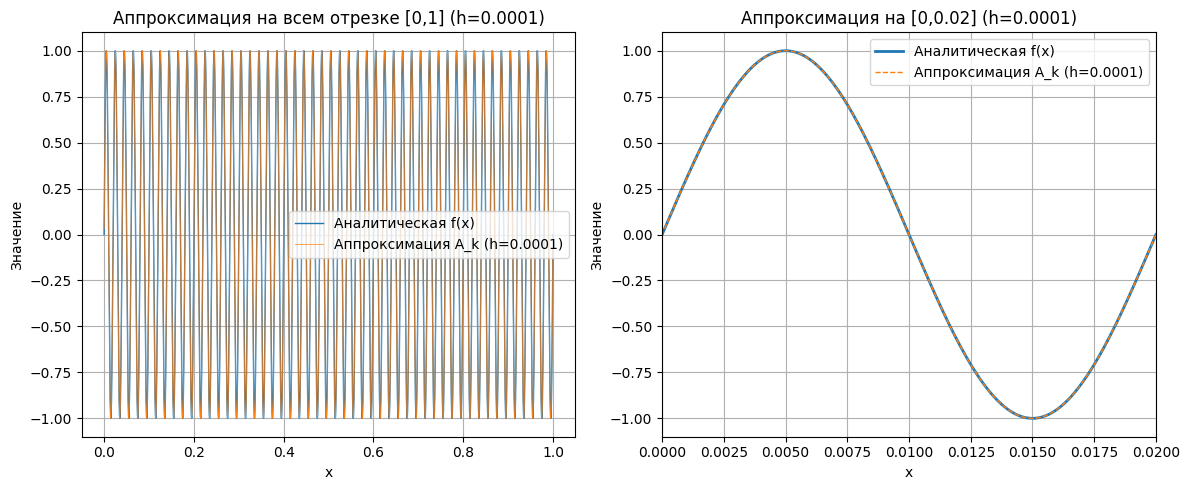

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# n = 100
# pi = np.pi

# def u(x):
#     return np.sin(pi * n * x) / (pi**2 * n**2)

# def f(x):
#     return np.sin(pi * n * x)

# h = 0.0001
# x = np.arange(0, 1, h)
# u_vals = u(x)
# A = np.zeros_like(x)
# A[1:-1] = -(u_vals[2:] - 2 * u_vals[1:-1] + u_vals[:-2]) / h**2

# x_inner = x[1:-1]
# A_inner = A[1:-1]

# # График на всем отрезке [0,1]
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# x_plot_full = np.linspace(0, 1, 100000)  # много точек для гладкого отображения
# f_analytical_full = f(x_plot_full)
# plt.plot(x_plot_full, f_analytical_full, label='Аналитическая f(x)', linewidth=1)
# plt.plot(x_inner, A_inner, label=f'Аппроксимация A_k (h={h})', linestyle='-', linewidth=0.5)
# plt.xlabel('x')
# plt.ylabel('Значение')
# plt.legend()
# plt.title(f'Аппроксимация на всем отрезке [0,1] (h={h})')
# plt.grid(True)

# # График на части [0,0.02]
# plt.subplot(1, 2, 2)
# x_plot_part = np.linspace(0, 0.02, 1000)
# f_analytical_part = f(x_plot_part)
# plt.plot(x_plot_part, f_analytical_part, label='Аналитическая f(x)', linewidth=2)
# plt.plot(x_inner, A_inner, label=f'Аппроксимация A_k (h={h})', linestyle='--', linewidth=1)
# plt.xlim(0, 0.02)
# plt.ylim(-1.1, 1.1)
# plt.xlabel('x')
# plt.ylabel('Значение')
# plt.legend()
# plt.title(f'Аппроксимация на [0,0.02] (h={h})')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


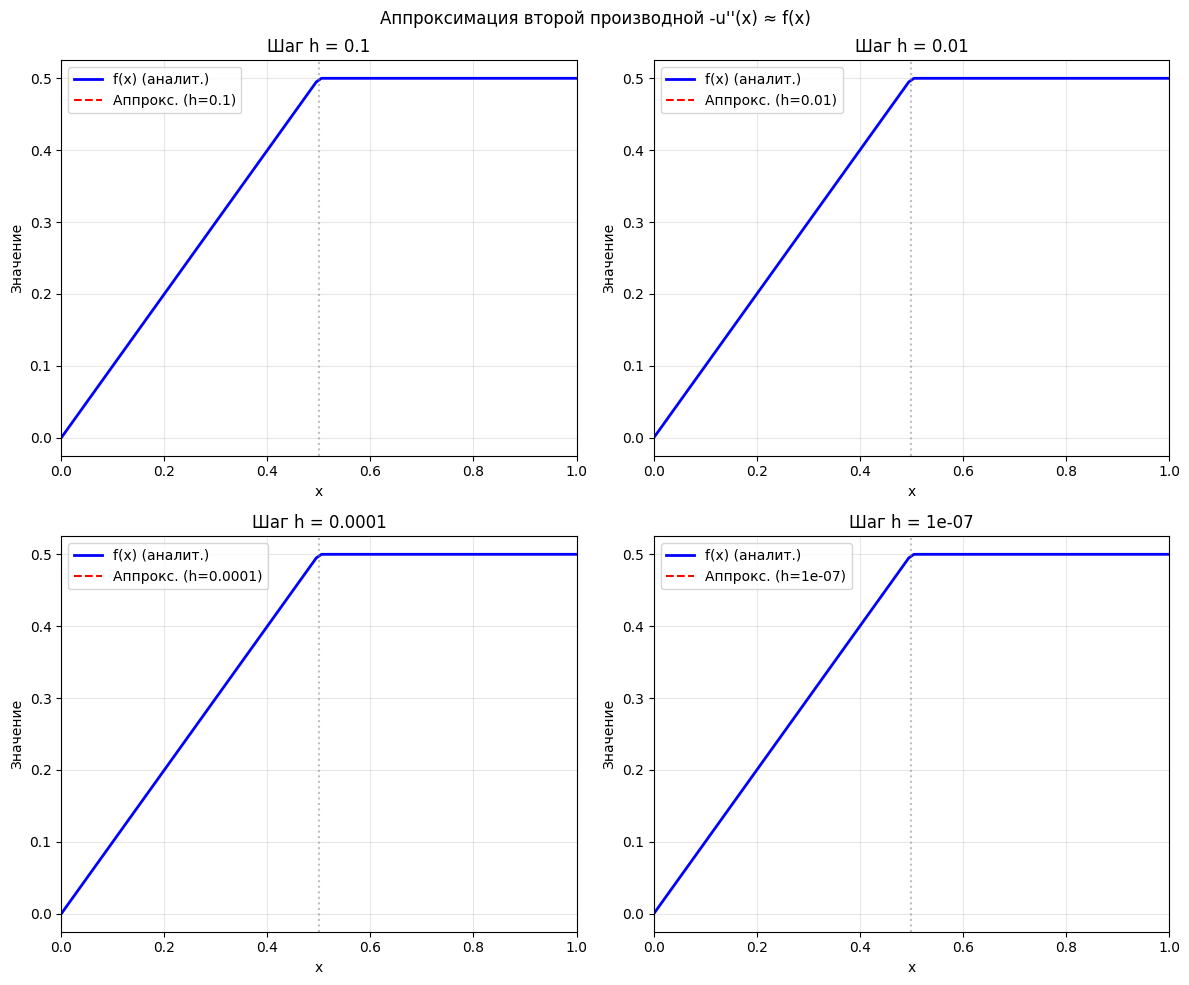

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def uPiecewise(x):
    result = np.zeros_like(x)
    mask1 = (x >= 0) & (x <= 0.5)
    mask2 = (x > 0.5) & (x <= 1)
    result[mask1] = -x[mask1]**3 / 6 - 5 / 48
    result[mask2] = -1/4 * x[mask2]**2 + 1/8 * x[mask2] + 1/8
    return result

def fPiecewise(x):
    result = np.zeros_like(x)
    mask1 = (x >= 0) & (x <= 0.5)
    mask2 = (x > 0.5) & (x <= 1)
    result[mask1] = x[mask1]
    result[mask2] = 0.5
    return result

def computeSecondDerivative(uValues, h):
    n = len(uValues)
    A = np.zeros(n)
    for i in range(1, n-1):
        A[i] = -(uValues[i+1] - 2*uValues[i] + uValues[i-1]) / (h**2)
    return A

hValues = [0.1, 0.01, 0.0001, 0.0000001]

xAnalytical = np.linspace(0, 1, 100)
fAnalytical = fPiecewise(xAnalytical)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, h in enumerate(hValues):
    x = np.arange(0, 1 + h, h)
    
    uVals = uPiecewise(x)
    A = computeSecondDerivative(uVals, h)
    xInner = x[1:-1]
    AInner = A[1:-1]
    
    ax = axes[i]
    ax.plot(xAnalytical, fAnalytical, 'b-', label='f(x) (аналит.)', linewidth=2)
    ax.plot(xInner, AInner, 'r--', label=f'Аппрокс. (h={h})', linewidth=1.5)
    ax.axvline(x=0.5, color='gray', linestyle=':', alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('Значение')
    ax.set_title(f'Шаг h = {h}')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, 1.5)  

plt.suptitle('Аппроксимация второй производной -u\'\'(x) ≈ f(x)')
plt.tight_layout()
plt.show()


# график ошибки в зависимости от h
# hList = np.logspace(-6, -1, 50)  # от 1e-6 до 0.1
# errors = []

# for h in hList:
#     # Создаем сетку с шагом h на [0,1]
#     x = np.arange(0, 1 + h, h)
#     # Вычисляем точное значение f на этой сетке (во внутренних точках)
#     fExact = fPiecewise(x[1:-1])
#     # Аппроксимация
#     uVals = uPiecewise(x)
#     fApprox = computeSecondDerivative(uVals, h)[1:-1]
#     # Максимальная ошибка по абсолютной величине
#     error = np.max(np.abs(fApprox - fExact))
#     errors.append(error)

# plt.figure(figsize=(10,6))
# plt.loglog(hList, errors, 'o-')
# plt.xlabel('Шаг h')
# plt.ylabel('Максимальная ошибка')
# plt.title('Зависимость максимальной ошибки от шага h')
# plt.grid(True)
# plt.show()

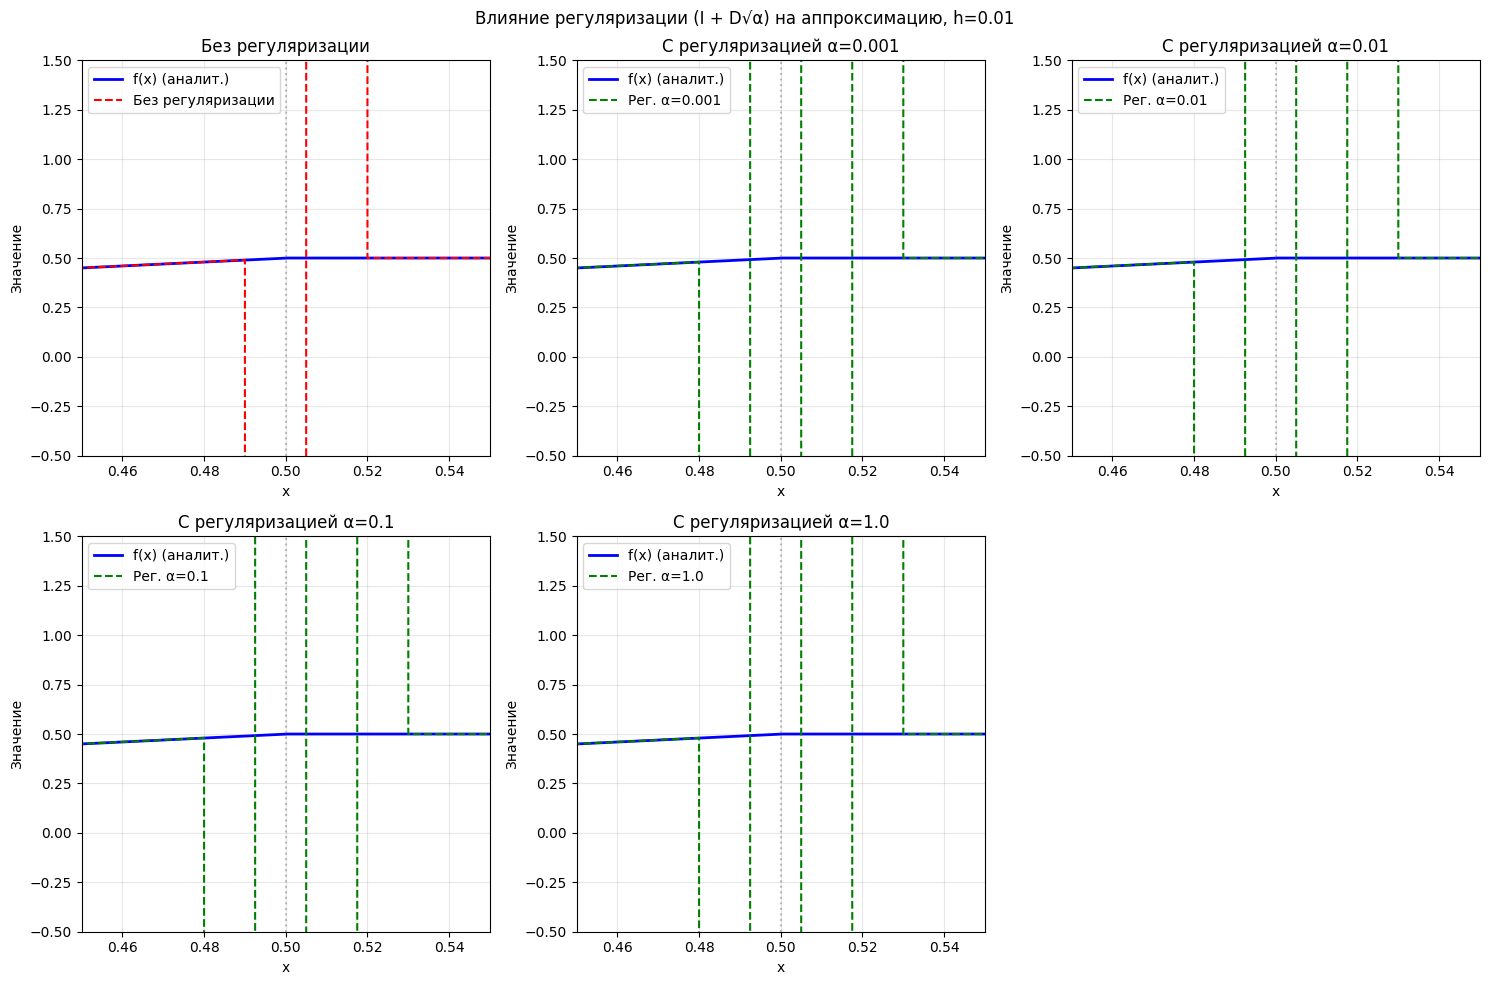

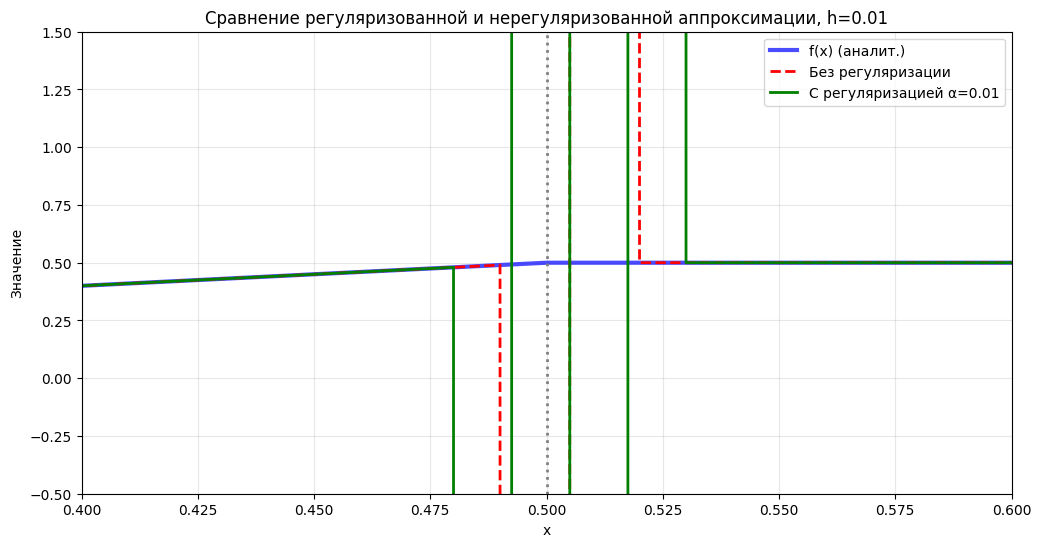

Сравнение ошибок при разных параметрах регуляризации:
без регуляризации         | Макс. ошибка: 2500.001667 | Средняя ошибка: 238.095317
α=0.001                   | Макс. ошибка: 2369208.772173 | Средняя ошибка: 300931.155456
α=0.01                    | Макс. ошибка: 7497501.666667 | Средняя ошибка: 952142.698333
α=0.1                     | Макс. ошибка: 23714587.721726 | Средняя ошибка: 3011454.412418
α=1.0                     | Макс. ошибка: 74997516.666667 | Средняя ошибка: 9523569.841190



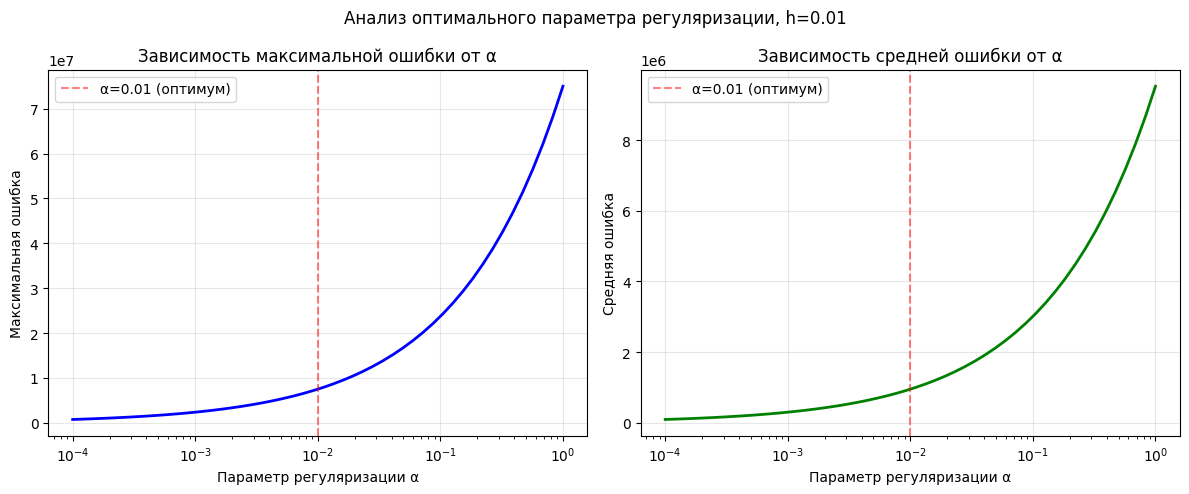

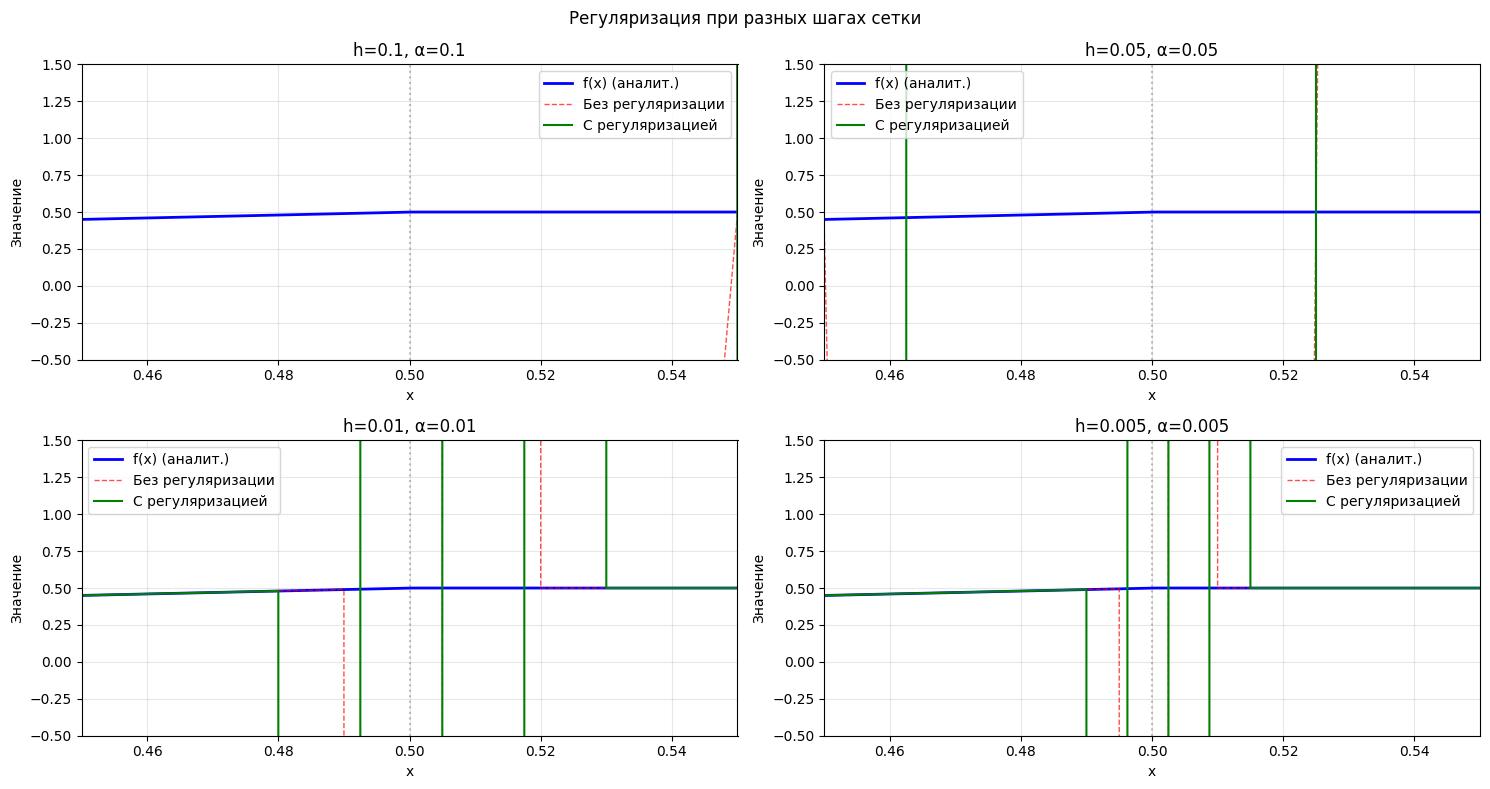


Физическая интерпретация регуляризации (I + D√α):
------------------------------------------------------------
1. Оператор D - это лапласиан (вторая производная), который 'размазывает' резкие скачки
2. Параметр α контролирует силу регуляризации:
   - α = 0: нет регуляризации, сохраняются все осцилляции
   - α малая: слабая регуляризация, немного сглаживает
   - α оптимальная: подавляет осцилляции, но сохраняет общую форму
   - α большая: сильное сглаживание, функция становится 'размытой'
3. Регуляризация добавляет искусственную вязкость в численную схему
4. Это позволяет стабилизировать вычисления в окрестности разрывов


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def uPiecewise(x):
    """Функция u(x) из задания"""
    result = np.zeros_like(x)
    
    mask1 = (x >= 0) & (x <= 0.5)
    mask2 = (x > 0.5) & (x <= 1)
    
    # x ∈ [0, 1/2]
    result[mask1] = -x[mask1]**3 / 6 - 5 / 48
    
    # x ∈ [1/2, 1] 
    result[mask2] = -1/4 * x[mask2]**2 + 1/8 * x[mask2] + 1/8
    
    return result

def fPiecewise(x):
    """Функция f(x) из задания"""
    result = np.zeros_like(x)
    
    mask1 = (x >= 0) & (x <= 0.5)
    mask2 = (x > 0.5) & (x <= 1)
    
    # x ∈ [0, 1/2]
    result[mask1] = x[mask1]
    
    # x ∈ [1/2, 1]
    result[mask2] = 0.5
    
    return result

def computeSecondDerivative(uValues, h):
    """Вычисление второй производной по разностной схеме"""
    n = len(uValues)
    A = np.zeros(n)
    
    for i in range(1, n-1):
        A[i] = -(uValues[i+1] - 2*uValues[i] + uValues[i-1]) / (h**2)
    
    return A

def regularizeApproximation(fApprox, h, alpha):
    """Применение регуляризации (I + D*sqrt(alpha)) к аппроксимации"""
    n = len(fApprox)
    fReg = np.zeros(n)
    
    # Применяем регуляризацию только к внутренним точкам
    for i in range(1, n-1):
        # Лапласиан (вторая производная) для регуляризации
        laplacian = (fApprox[i+1] - 2*fApprox[i] + fApprox[i-1]) / (h**2)
        fReg[i] = fApprox[i] + np.sqrt(alpha) * laplacian
    
    # Граничные точки оставляем без изменений
    fReg[0] = fApprox[0]
    fReg[-1] = fApprox[-1]
    
    return fReg

# Параметры
h = 0.01
alphaValues = [0.001, 0.01, 0.1, 1.0]

# Создаем сетку
x = np.arange(0, 1 + h, h)
xAnalytical = np.linspace(0, 1, 1000)

# Вычисляем аналитические значения
uAnalytical = uPiecewise(xAnalytical)
fAnalytical = fPiecewise(xAnalytical)

# Вычисляем аппроксимацию без регуляризации
uVals = uPiecewise(x)
fApprox = computeSecondDerivative(uVals, h)

# График: сравнение регуляризаций
plt.figure(figsize=(15, 10))

# 1. Без регуляризации
plt.subplot(2, 3, 1)
plt.plot(xAnalytical, fAnalytical, 'b-', label='f(x) (аналит.)', linewidth=2)
plt.plot(x[1:-1], fApprox[1:-1], 'r--', label='Без регуляризации', linewidth=1.5)
plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Значение')
plt.title('Без регуляризации')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0.45, 0.55)
plt.ylim(-0.5, 1.5)

# 2-5. С разными параметрами регуляризации
for i, alpha in enumerate(alphaValues):
    # Применяем регуляризацию
    fReg = regularizeApproximation(fApprox, h, alpha)
    
    plt.subplot(2, 3, i+2)
    plt.plot(xAnalytical, fAnalytical, 'b-', label='f(x) (аналит.)', linewidth=2)
    plt.plot(x[1:-1], fReg[1:-1], 'g--', label=f'Рег. α={alpha}', linewidth=1.5)
    plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('Значение')
    plt.title(f'С регуляризацией α={alpha}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(0.45, 0.55)
    plt.ylim(-0.5, 1.5)

plt.suptitle(f'Влияние регуляризации (I + D√α) на аппроксимацию, h={h}')
plt.tight_layout()
plt.show()

# График: только лучшая регуляризация в сравнении
plt.figure(figsize=(12, 6))

# Выбираем оптимальный alpha (на глаз)
optimalAlpha = 0.01
fRegOptimal = regularizeApproximation(fApprox, h, optimalAlpha)

plt.plot(xAnalytical, fAnalytical, 'b-', label='f(x) (аналит.)', linewidth=3, alpha=0.7)
plt.plot(x[1:-1], fApprox[1:-1], 'r--', label='Без регуляризации', linewidth=2)
plt.plot(x[1:-1], fRegOptimal[1:-1], 'g-', label=f'С регуляризацией α={optimalAlpha}', linewidth=2)

plt.axvline(x=0.5, color='gray', linestyle=':', linewidth=2)
plt.xlabel('x')
plt.ylabel('Значение')
plt.title(f'Сравнение регуляризованной и нерегуляризованной аппроксимации, h={h}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0.4, 0.6)
plt.ylim(-0.5, 1.5)
plt.show()

# Анализ ошибок для разных alpha
print("Сравнение ошибок при разных параметрах регуляризации:")
print("=" * 60)

for alpha in [0, 0.001, 0.01, 0.1, 1.0]:
    if alpha == 0:
        fCurrent = fApprox
        alphaLabel = "без регуляризации"
    else:
        fCurrent = regularizeApproximation(fApprox, h, alpha)
        alphaLabel = f"α={alpha}"
    
    # Вычисляем ошибки
    mask = (x[1:-1] >= 0.4) & (x[1:-1] <= 0.6)  # Окрестность разрыва
    fExact = fPiecewise(x[1:-1][mask])
    fCurrentInner = fCurrent[1:-1][mask]
    
    maxError = np.max(np.abs(fCurrentInner - fExact))
    meanError = np.mean(np.abs(fCurrentInner - fExact))
    
    print(f"{alphaLabel:25} | Макс. ошибка: {maxError:.6f} | Средняя ошибка: {meanError:.6f}")

print("\n" + "=" * 60)

# График зависимости ошибки от alpha
alphaTest = np.logspace(-4, 0, 50)  # alpha от 0.0001 до 1
maxErrors = []
meanErrors = []

for alpha in alphaTest:
    fReg = regularizeApproximation(fApprox, h, alpha)
    
    mask = (x[1:-1] >= 0.4) & (x[1:-1] <= 0.6)
    fExact = fPiecewise(x[1:-1][mask])
    fRegInner = fReg[1:-1][mask]
    
    maxErrors.append(np.max(np.abs(fRegInner - fExact)))
    meanErrors.append(np.mean(np.abs(fRegInner - fExact)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphaTest, maxErrors, 'b-', linewidth=2)
plt.xlabel('Параметр регуляризации α')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость максимальной ошибки от α')
plt.grid(True, alpha=0.3)
plt.axvline(x=0.01, color='r', linestyle='--', alpha=0.5, label='α=0.01 (оптимум)')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(alphaTest, meanErrors, 'g-', linewidth=2)
plt.xlabel('Параметр регуляризации α')
plt.ylabel('Средняя ошибка')
plt.title('Зависимость средней ошибки от α')
plt.grid(True, alpha=0.3)
plt.axvline(x=0.01, color='r', linestyle='--', alpha=0.5, label='α=0.01 (оптимум)')
plt.legend()

plt.suptitle(f'Анализ оптимального параметра регуляризации, h={h}')
plt.tight_layout()
plt.show()

# Дополнительный анализ: как меняется регуляризация при разных h
plt.figure(figsize=(15, 8))

hValues = [0.1, 0.05, 0.01, 0.005]
optimalAlphas = {0.1: 0.1, 0.05: 0.05, 0.01: 0.01, 0.005: 0.005}  # Подобраны на глаз

for i, h in enumerate(hValues):
    xLocal = np.arange(0, 1 + h, h)
    uValsLocal = uPiecewise(xLocal)
    fApproxLocal = computeSecondDerivative(uValsLocal, h)
    fRegLocal = regularizeApproximation(fApproxLocal, h, optimalAlphas[h])
    
    plt.subplot(2, 2, i+1)
    plt.plot(xAnalytical, fAnalytical, 'b-', label='f(x) (аналит.)', linewidth=2)
    plt.plot(xLocal[1:-1], fApproxLocal[1:-1], 'r--', label='Без регуляризации', linewidth=1, alpha=0.7)
    plt.plot(xLocal[1:-1], fRegLocal[1:-1], 'g-', label=f'С регуляризацией', linewidth=1.5)
    plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('Значение')
    plt.title(f'h={h}, α={optimalAlphas[h]}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(0.45, 0.55)
    plt.ylim(-0.5, 1.5)

plt.suptitle('Регуляризация при разных шагах сетки')
plt.tight_layout()
plt.show()

# Физическая интерпретация регуляризации
print("\nФизическая интерпретация регуляризации (I + D√α):")
print("-" * 60)
print("1. Оператор D - это лапласиан (вторая производная), который 'размазывает' резкие скачки")
print("2. Параметр α контролирует силу регуляризации:")
print("   - α = 0: нет регуляризации, сохраняются все осцилляции")
print("   - α малая: слабая регуляризация, немного сглаживает")
print("   - α оптимальная: подавляет осцилляции, но сохраняет общую форму")
print("   - α большая: сильное сглаживание, функция становится 'размытой'")
print("3. Регуляризация добавляет искусственную вязкость в численную схему")
print("4. Это позволяет стабилизировать вычисления в окрестности разрывов")

In [ ]:
zz